In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import jieba.posseg as psg


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [4]:
reviews = pd.read_csv(r'D:\Crawler\51job\经济-1-clean-只看月薪.csv', encoding='gb18030')

In [5]:
reviews.dropna(inplace=True)
reviews.drop_duplicates()
reviews.shape

(552, 14)

In [6]:
print(reviews.shape)
reviews.head()

(552, 14)


,职位名称,公司名称,薪酬,城市地区,学历要求,工作经验要求,公司福利,公司标签,职位描述或任职要求,规模类型,地区,薪酬_n,月薪最小值,月薪最大值
0,区域经济研究,云南火天传媒有限公司,8千-1万,昆明-西山区,本科,3-4年经验,数据分析,文字媒体/出版,1.熟悉云南区域经济基本情况，对云南对外经济合作了解；2.能够撰写内容详实的经济研究报告；3...,民营 | 50-150人,昆明,8000-10000,8000.0,10000.0
1,金融/经济研究员（周末双休）,广州港晟商务咨询有限公司,9千-1.3万·13薪,广州,大专,1年经验,金融,金融/投资/证券,岗位职责：1、对行情基本面和策略面进行分析，预测未来走势，撰写分析报告；2、通过财经新闻，搜...,民营 | 50-150人,广州,9000-13000,9000.0,13000.0
2,金融/经济研究员,广州港晟商务咨询有限公司,9千-1.3万·13薪,广州-天河区,大专,1年经验,金融,金融/投资/证券,岗位职责：1、对行情基本面和策略面进行分析，预测未来走势，撰写分析报告；2、通过财经新闻，搜...,民营 | 50-150人,广州,9000-13000,9000.0,13000.0
3,宏观经济研究员,中采智联信息科技（北京）有限责任公司,1.5-3万,北京,硕士,2年经验,宏观，策略,专业服务(咨询、人力资源、财会),1、跟踪和研究国内外宏观经济政策的走向；2、收集各类金融市场相关信息，掌握了解国际经济形势；...,民营 | 少于50人,北京,15000-30000,15000.0,30000.0
4,经济学院实验教师,湖北商贸学院,5-7千,武汉-洪山区,硕士,无需经验,周末双休,教育/培训/院校,1.硕士研究生学历学位且本科阶段为普通***统招本科；2.经济学、金融学等相关专业硕士；3....,事业单位 | 500-1000人,武汉,5000-7000,5000.0,7000.0


In [7]:
content = reviews['职位描述或任职要求']

In [8]:
content

0      1.熟悉云南区域经济基本情况，对云南对外经济合作了解；2.能够撰写内容详实的经济研究报告；3...
1      岗位职责：1、对行情基本面和策略面进行分析，预测未来走势，撰写分析报告；2、通过财经新闻，搜...
2      岗位职责：1、对行情基本面和策略面进行分析，预测未来走势，撰写分析报告；2、通过财经新闻，搜...
3      1、跟踪和研究国内外宏观经济政策的走向；2、收集各类金融市场相关信息，掌握了解国际经济形势；...
4      1.硕士研究生学历学位且本科阶段为普通***统招本科；2.经济学、金融学等相关专业硕士；3....
                             ...                        
553    【岗位要求】1.负责Web前端核心模块的设计和开发工作，对代码质量和进度负责；2.开发基于H...
554    【岗位职责】1.完成学校规定的教学、科研工作；2.完成学校、院系规定的其他工作。【任职条件】...
555    岗位职责：1、资产信息化平台管理、资产数据分析、运用；2、了解市场经济和社区管理要求，拓展客...
556    1.主要负责校区专升本大学语文科目的讲授；2.根据教材内容编制教案、备课、授课、参与教研活动...
557    【岗位职责】1.开展数字经济和科技创新领域的专题智库研究，包括数字经济发展、数字经济治理、数...
Name: 职位描述或任职要求, Length: 552, dtype: object

In [20]:
strinfo = re.compile('[0-9a-zA-Z]|职位描述|岗位职责|任职要求|职位描述及要求|工作职责|岗位要求|精通|熟悉|负责|开发|工作|节假日|经验|相关|能力|福利|公司|优先')
content = content.apply(lambda x: strinfo.sub('',x))

In [21]:
worker = lambda s: [(x.word, x.flag) for x in psg.cut(s)] # 自定义简单分词函数
seg_word = content.apply(worker)

In [22]:
seg_word.head()

0    [(., x), (云南, ns), (区域, n), (经济, n), (基本, n), ...
1    [(：, x), (、, x), (对, p), (行情, n), (基本面, n), (和...
2    [(：, x), (、, x), (对, p), (行情, n), (基本面, n), (和...
3    [(、, x), (跟踪, v), (和, c), (研究, vn), (国内外, s), ...
4    [(., x), (硕士, n), (研究生, n), (学历, n), (学位, n), ...
Name: 职位描述或任职要求, dtype: object

In [23]:
type(seg_word)
type(list(seg_word))

list

In [24]:
# 将词语转为数据框形式，一列是词，一列是词语所在的句子ID，最后一列是词语在该句子的位置
n_word = seg_word.apply(lambda x: len(x))  # 每一评论中词的个数

n_content = [[x+1]*y for x,y in zip(list(seg_word.index), list(n_word))]

# 将嵌套的列表展开，作为词所在评论的id
index_content = sum(list(n_content), [])
# seg_word = list(seg_word)

In [25]:
seg_word = sum(seg_word, [])
# 词性
word = [x[0] for x in seg_word]
# 词性
nature = [x[1] for x in seg_word]

# content_type = [[x]*y for x,y in zip(list(reviews['content_type']), list(n_word))]
# # 评论类型
# content_type = sum(content_type, [])

result = pd.DataFrame({"index_content":index_content,
                       "word":word,
                       "nature":nature,
                       # "content_type":content_type
                       })

In [26]:
# 删除标点符号
result = result[result['nature'] != 'x']  # x表示标点符号

# 删除停用词
stop_path = open(r"D:\DL_Homework\NLP\Data\电商产品评论数据情感分析\stoplist.txt",encoding='UTF-8')
stop = stop_path.readlines()
stop = [x.replace('\n', '') for x in stop]
word = list(set(word) - set(stop))
result = result[result['word'].isin(word)]

In [27]:
result.head()

,index_content,word,nature
1,1,云南,ns
2,1,区域,n
3,1,经济,n
5,1,情况,n
8,1,云南,ns


In [28]:
# 构造各词在对应评论的位置列
n_word = list(result.groupby(by = ['index_content'])['index_content'].count())
index_word = [list(np.arange(0, y)) for y in n_word]
# 词语在该评论的位置
index_word = sum(index_word, [])
# 合并评论id
result['index_word'] = index_word

result.head()

,index_content,word,nature,index_word
1,1,云南,ns,0
2,1,区域,n,1
3,1,经济,n,2
5,1,情况,n,3
8,1,云南,ns,4


In [29]:
# # 提取含有名词类的评论,即词性含有“n”的评论
# ind_n = result[['n' in x for x in result['nature']]]['index_content'].unique()
# result_n = result[[x in ind_n for x in result['index_content']]]
# result_n.head()

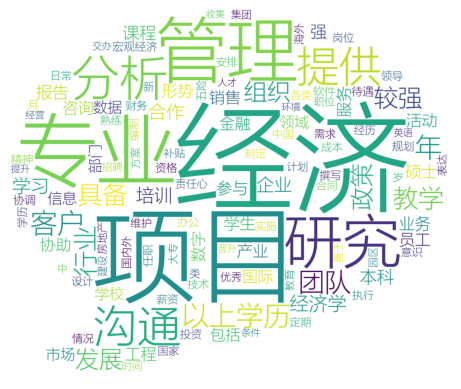

In [30]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

frequencies = result.groupby('word')['word'].count()
frequencies = frequencies.sort_values(ascending = False)
backgroud_Image=plt.imread('D:\DL_Homework\\NLP\Data\电商产品评论数据情感分析\pl.jpg')

# 自己上传中文字体到kesci
font_path = 'D:\DL_Homework\\NLP\Data\电商产品评论数据情感分析\MSYHL.TTC'
wordcloud = WordCloud(font_path=font_path, # 设置字体，不设置就会出现乱码
                      max_words=120,
                      background_color='white',
                      mask=backgroud_Image)# 词云形状

my_wordcloud = wordcloud.fit_words(frequencies)
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()